## Final Project Submission

Please fill out:
* Student name: CHARLES KAGWANJA
* Student pace: Part-Time
* Scheduled project review date/time: 25 July 2023
* Instructor name: ASHA DEEN
* Blog post URL: https://github.com/07Clausewitz/MS_Movie_Project_Analysis

# INTRODUCTION

This projects is aimed at performing an analysis for Microsoft with a view to advise the company in what type of Movies to invest in as they venture into movie production. The analysis explores data provided, but pays emphasis on data that have relationship to movie genres as the focus of the analysis revolves around "types of films". The objective is to analyse the data with enough visualizations and make recommendations to the company

# BUSINESS QUESTIONS


As stated in the above we are charged with exploring **what types of films** are currently doing the best at the box office.

In this regards we have formulated the following questions that will aid in delivering that mandate:

i. What are the most popular genres?

ii: What are the most profitable genres to invest in?

iii:What Genres Has the Highest Ratings?

iv. What Genres have the highest Gross Profit

# Requirements


1.**Import the required libraries:**

  *We shall import several Python libraries to aid in performing the task. Pandas and Numpy for data inspection, exploration, and management; Matplolib and seasbon for creation of visualisations*

2.**Explore Data and Perform Data Cleaning**

  *We shall attempt to clean data as much as possible in order to generate precise output and avoid errors as well as make it posssible to create visualisation.*


  The cleaned data shall be used to answer the business questions listed.

# IMPORT NECESSARY LIBRARIES

In [ ]:
#File search tools to explore the data folder
import glob, os

# Import required libraries
import numpy as np
import pandas as pd

#For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

#To custominze visualization
plt.style.use('seaborn-v0_8')
#colors = ['#003049','#023047','#03254c','#045C94','#1167b1','#187bcd','#219EBC','#2a9df4','#1F2F98','#1CA7EC','#16558F','#0583D2','#42829D','#61C0BC','#8ECAE6','#045C94']

# IMPORTING DATA

In [ ]:
movie_gross = pd.read_csv('DATA/bom.movie_gross.csv')
name_basic = pd.read_csv('DATA/name.basics.csv')
rt_movie_info = pd.read_csv('/DATA/rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('DATA/rt.reviews.tsv', sep='\t', encoding='windows-1252')
title_akas = pd.read_csv('DATA/title.akas.csv')
title_basics = pd.read_csv('DATA/title.basics.csv')
title_crew = pd.read_csv('DATA/title.crew.csv')
title_principals = pd.read_csv('DATA/title.principals.csv')
title_ratings = pd.read_csv('DATA/title.ratings.csv')
tmdb_movies = pd.read_csv('DATA/tmdb.movies.csv')
movie_budgets = pd.read_csv('DATA/tn.movie_budgets.csv')

# Question i. What are the most popular genres?



##Cleaning the Data
#####Check  and Remove Duplicate

In [3]:
#Check Duplicates
print(title_basics['primary_title'].duplicated().sum())

#Remove Duplicates by use Primary title
title_basics.drop_duplicates(subset='primary_title',keep='first',inplace=True)

print(title_basics['primary_title'].duplicated().sum())

10073
0


Dropping Duplicates

In [4]:
#Dropping nan values in title basics using the Genres Column
Basics_w_dropped_genre = title_basics.dropna(subset=['genres'])
Basics_w_dropped_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131180 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           131180 non-null  object 
 1   primary_title    131180 non-null  object 
 2   original_title   131178 non-null  object 
 3   start_year       131180 non-null  int64  
 4   runtime_minutes  104584 non-null  float64
 5   genres           131180 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.0+ MB


##Generating Data

In [5]:
#Generate a list of all instances a genre appear in the data set
genres_df = Basics_w_dropped_genre['genres'].str.split(',')

genre_list= []
for genre in genres_df:
   if isinstance(genre,list):
        genre_list.extend(genre)

#Convert the list in to a dataframe and the counts and print top five
          #We used this pandas method because the code ran faster

genre_counts = pd.DataFrame(genre_list).value_counts().head(10)
genre_counts

Documentary    49345
Drama          45287
Comedy         24014
Thriller       10444
Horror          9845
Action          9530
Romance         8639
Biography       8312
Crime           6128
Adventure       6104
dtype: int64

##Plotting Bar Graph

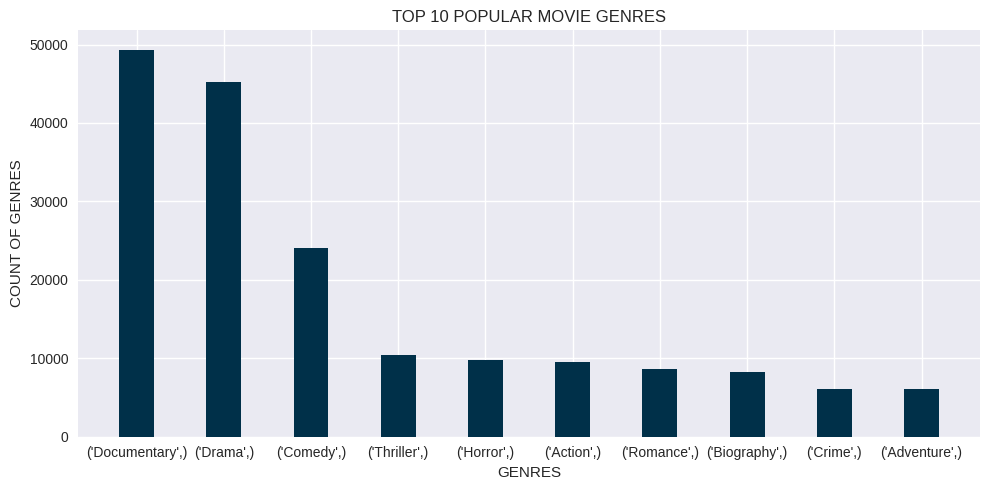

In [6]:
#Generating the data
genres_count_dict = genre_counts.to_dict()

Genres = [str(genre) for genre in genres_count_dict.keys()]
Counts = [int(genre) for genre in genres_count_dict.values()]

#Plotting the Dar Chart
fig = plt.figure(figsize = (10, 5))

plt.bar(Genres, Counts, color='#003049', width = 0.4)


#Title of the Graph
plt.title("TOP 10 POPULAR MOVIE GENRES")
plt.xlabel('GENRES')
plt.ylabel('COUNT OF GENRES')

#Save the chart in the Images  folder
#plt.savefig(fname='./images/popular_genre.png')

#Display the Bar Graph
plt.tight_layout()
plt.show()

# Question ii: What are the most profitable genres to invest in?

check Data

In [7]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


###Data Cleaning

We observed in the above cell that the columns (production_budget,domestic_gross and worldwide_gross) contains dollars signs and commas. That will need to be removed in order to used the figures as intergers to allow calcutation

We also observed that the data contains 84 dupicates needs to be removed

In [8]:
#Check iif there are duplicates
print(f"Number of duplicates = {movie_budgets['movie'].duplicated().sum()}"'\n','\n')

#Print first five rows of dataframe to view the data
movie_budgets.head()

Number of duplicates = 84
 



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
#Replaces dollar sign and comma in each of the three columns
movie_budgets['production_budget'] = movie_budgets.production_budget.apply(lambda x: x.replace(',','').replace('$','')).astype('int64')
movie_budgets['domestic_gross'] = movie_budgets.domestic_gross.apply(lambda x: x.replace(',','').replace('$','')).astype('int64')
movie_budgets['worldwide_gross'] = movie_budgets.worldwide_gross.apply(lambda x: x.replace(',','').replace('$','')).astype('int64')

#Removes duplicates
movie_budgets.drop_duplicates(subset='movie',keep='first',inplace=True)




### Insert New Columns

In this section we add to new columns that include calculations of Profit and percentage profits.

In [10]:
# Calculate the Profit
movie_budgets['profit'] = (movie_budgets['worldwide_gross']) - (movie_budgets['production_budget'])
# Calculate Percentage Profit
movie_budgets['percentage_profit'] = (movie_budgets['profit']/movie_budgets['production_budget']) * 100

preview movie_budgets dataframe after cleaning

In [11]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5698 non-null   int64  
 1   release_date       5698 non-null   object 
 2   movie              5698 non-null   object 
 3   production_budget  5698 non-null   int64  
 4   domestic_gross     5698 non-null   int64  
 5   worldwide_gross    5698 non-null   int64  
 6   profit             5698 non-null   int64  
 7   percentage_profit  5698 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 400.6+ KB


### ***MERGE Databases*** ###

In [12]:
#Merge the budgets data to title basics using two columns named differently in two dataframes but contains similar values

merge_titles_budgets = movie_budgets.merge(title_basics, left_on='movie', right_on='primary_title')
merge_titles_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,percentage_profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"


<Axes: title={'center': 'Percentage Profit by Genre'}, ylabel='genres'>

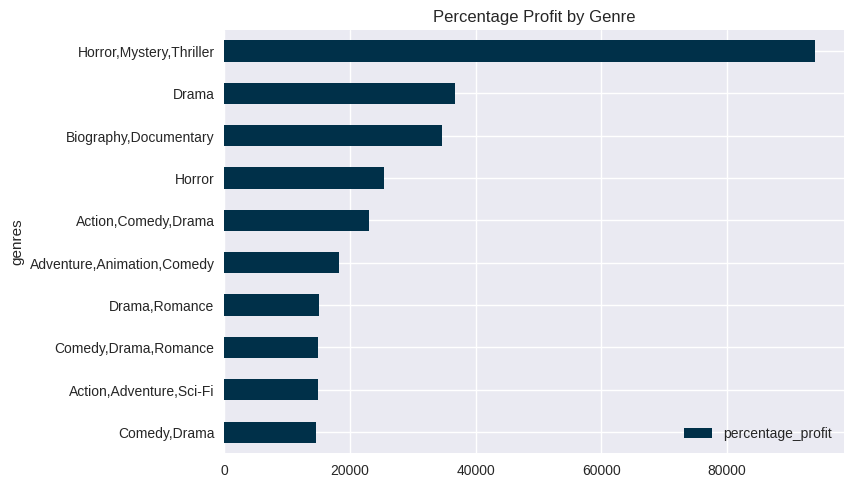

In [13]:
genre_pct_profit = merge_titles_budgets.groupby('genres')['percentage_profit'].sum().sort_values(ascending=False)

genre_profits = genre_pct_profit.head(10)

#Sort the pandas series in descending order (in order to display the highest figures at the top of horizontal graph)
genre_profits = pd.DataFrame(genre_profits.sort_values())

#Plotting a Horizontal Bar Graph
genre_profits.plot.barh(color='#003049', title='Percentage Profit by Genre')

In [14]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Ratings

# Question iii:What Genres Has the Highest Ratings?

Merge Data

In [15]:
ratings_profits = merge_titles_budgets.merge(title_ratings, how='left', on='tconst')
ratings_profits.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,percentage_profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,tt1775309,Avatar,Abatâ,2011,93.0,Horror,6.1,43.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624.0


<ipython-input-16-267247567d2b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratings_n_profits = merge_titles_budgets.merge(title_ratings, how='left', on='tconst').groupby('genres').sum().sort_values(by='averagerating', ascending=False)


<Axes: title={'center': 'Top Rated Genres'}, xlabel='GENRE', ylabel='RATINGS'>

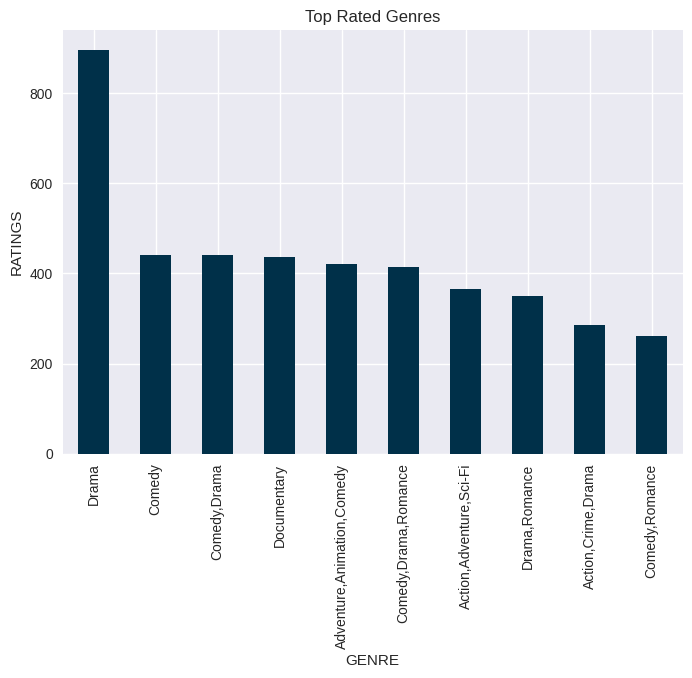

In [16]:
ratings_n_profits = merge_titles_budgets.merge(title_ratings, how='left', on='tconst').groupby('genres').sum().sort_values(by='averagerating', ascending=False)

#ratings_n_profits = ratings_profits.loc[:, ratings_profits['genres', 'percentage_profit', 'averagerating']]
ratings = ratings_n_profits['averagerating'].head(10)
ratings.plot.bar(title = 'Top Rated Genres', color='#003049', ylabel='RATINGS', xlabel='GENRE')
#.corr(ratings_n_profits['percentage_profit'])
#correlation.plot.barh()

# How Do the Production Cost of the top 10 Popular genres relate to gross profits

Drop duplicates

In [18]:
merge_titles_budgets = merge_titles_budgets.drop_duplicates()
#merge_titles_budgets.pivot(index='genres', columns= 'percentage_profit', values= 'percentage_profit')

Calculate Top Earners

In [19]:
global_gross = merge_titles_budgets.groupby('genres')['percentage_profit'].sum().sort_values(ascending=False)
top10_earner_genres = global_gross.head(10)

Plot Top Earners

<Axes: title={'center': 'TOP 10 EARNERS'}, xlabel='GENRES', ylabel='Log of Earnings '>

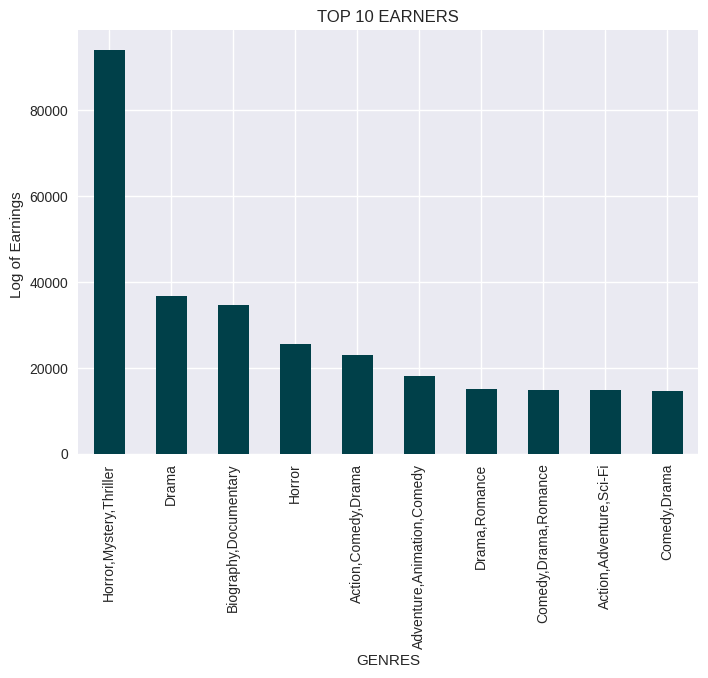

In [20]:
top10_earner_genres.plot.bar(title="TOP 10 EARNERS", xlabel='GENRES', ylabel='Log of Earnings ', color='#004049')

Calculate Genres Highest Production Costs

In [21]:
most_expensive = merge_titles_budgets.groupby('genres')['production_budget'].sum().sort_values(ascending=False)

most_expensive = most_expensive.head(10)

most_expensive

genres
Action,Adventure,Sci-Fi       9070400000
Adventure,Animation,Comedy    6496500000
Action,Adventure,Fantasy      4955600000
Drama                         3497539000
Action,Adventure,Comedy       2551500000
Action,Adventure,Drama        2387600000
Adventure,Family,Fantasy      2166400000
Comedy                        2007501173
Action,Adventure,Animation    1957500000
Documentary                   1712178000
Name: production_budget, dtype: int64

Combine two sets  of data to merge the plots

In [22]:
combined = pd.concat([top10_earner_genres,most_expensive] , axis=1)#
combined = combined.dropna()

Ploting Genres by both Profit and Production Cost

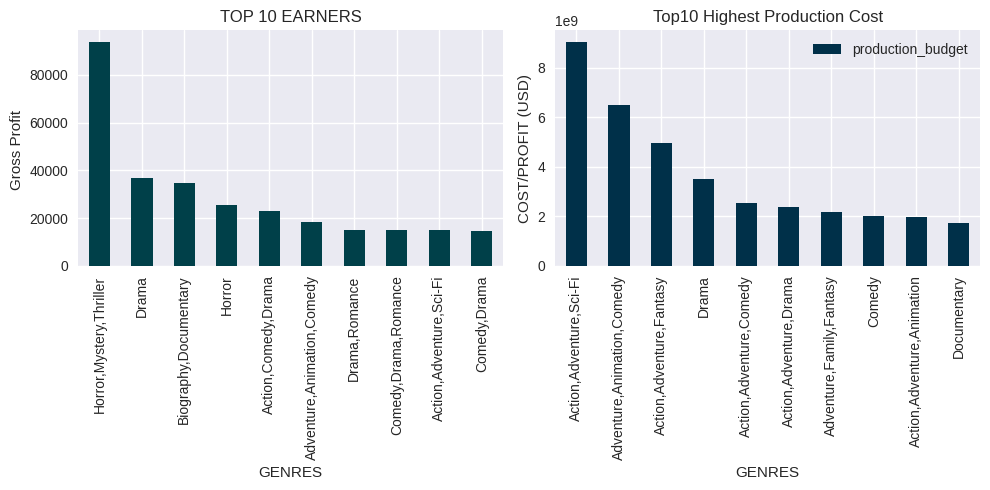

In [23]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)

top10_earner_genres.plot.bar(title="TOP 10 EARNERS", xlabel='GENRES', ylabel='Gross Profit ', color='#004049')

plt.subplot(1,2,2)
most_expensive.plot.bar(color='#003049')

plt.xlabel('GENRES')
plt.ylabel('COST/PROFIT (USD)')
plt.title('Top10 Highest Production Cost')

plt.legend()

plt.tight_layout()

plt.savefig('plot.png')

plt.show()

In [24]:
#budget_vs_production.columns

Contasting Production Budget by Percentage Profit

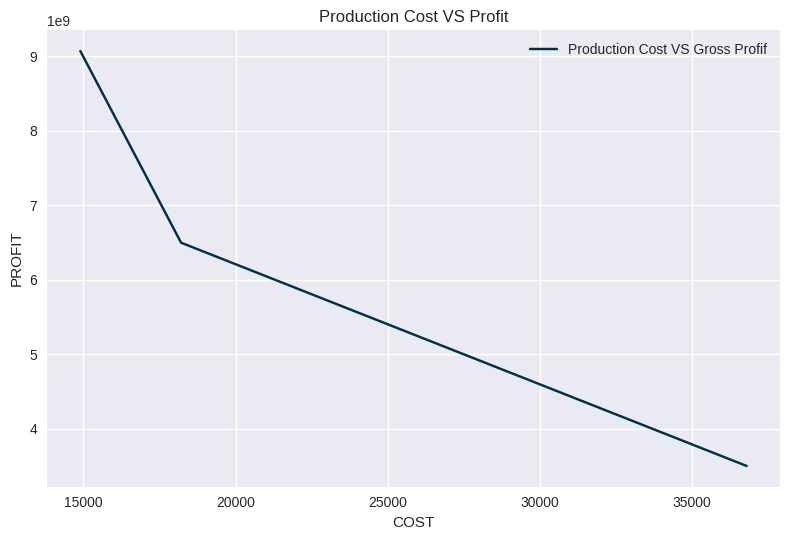

In [25]:
budget_vs_production = pd.concat([top10_earner_genres, most_expensive], axis =1)
budget_vs_production = budget_vs_production.dropna()

plt.plot( budget_vs_production['percentage_profit'],budget_vs_production['production_budget'], color='#003049', label='Production Cost VS Gross Profif')


#most_expensive.plot.bar()


plt.xlabel('COST')
plt.ylabel('PROFIT')
plt.title('Production Cost VS Profit')

plt.legend()

plt.tight_layout()

plt.savefig('plot.png')

plt.show()